# Playground to experiment

In [1]:
import gensim
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import kmeans
from pre_process import extract_mapped_doc2vecs, Doc2vec_wrapper

## Compute optimal minPts and eps value for DBSCAN

Using the heuristic suggested in Section 4.2 of the [DBSCAN paper](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf).

In [2]:
from utils import compute_optimal_k_dists
def get_kdist_plot(data, k):
    kdists = sorted(compute_optimal_k_dists(data, k), reverse=True)
    #len(kdists)

    plt.plot(range(1, len(kdists) + 1), kdists, '-ro')
    return plt.show

### ETD docvectors

23140
Computing 3-dist for 23140th point
Time taken 1:15:40.303352s


<function matplotlib.pyplot.show(*args, **kw)>

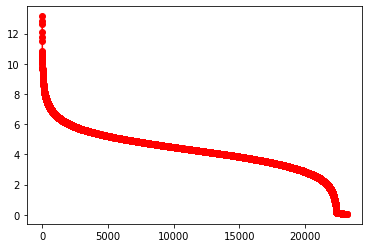

In [3]:
DOCVEC_PATH = '../obj/etd/doc2vec/abstracts_etd_doc2vec_all_docs30961_docs'

docvec_model = gensim.models.doc2vec.Doc2Vec.load(DOCVEC_PATH)

doc_vectors, keys = extract_mapped_doc2vecs(docvec_model)

get_kdist_plot(np.array(doc_vectors), 3)

23140
Computing 4-dist for 23140th point
Time taken 1:15:17.934259s


<function matplotlib.pyplot.show(*args, **kw)>

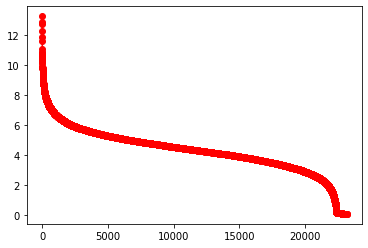

In [4]:
get_kdist_plot(np.array(doc_vectors), 4)

23140
Computing 5-dist for 23140th point
Time taken 1:14:47.286386s


<function matplotlib.pyplot.show(*args, **kw)>

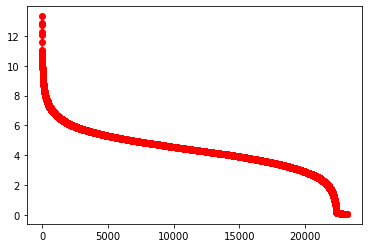

In [5]:
get_kdist_plot(np.array(doc_vectors), 5)

23140
Computing 8-dist for 23140th point
Time taken 1:14:34.074805s


<function matplotlib.pyplot.show(*args, **kw)>

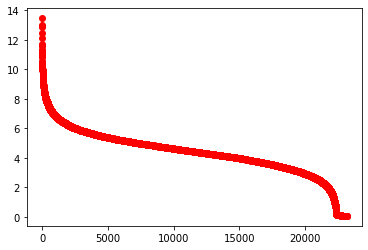

In [6]:
get_kdist_plot(np.array(doc_vectors), 8)

23140
Computing 10-dist for 23140th point
Time taken 1:15:22.164549s


<function matplotlib.pyplot.show(*args, **kw)>

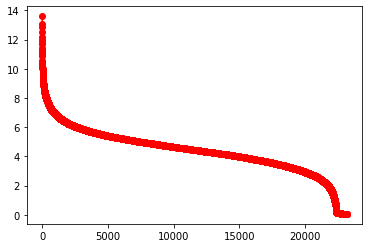

In [7]:
get_kdist_plot(np.array(doc_vectors), 10)